# **Berlin Supermarket Product Pricing Insights**

---



**Tools Used**: Python, Pandas, Matplotlib, Seaborn, Jupyter Notebook  
**Dataset**: Berlin Grocery Products Dataset

---



## Introduction

Driven by curiosity about how different supermarkets price their products, I explored a Berlin-based grocery dataset to uncover hidden patterns and trends. This project involved conducting an exploratory data analysis (EDA) to better understand pricing strategies across various categories and brands. The goal was to extract insights that could support smarter pricing decisions and more efficient inventory planning.

---



## Data Loading and Overview

The dataset was loaded using Pandas and a quick overview was performed to understand the structure, column types, and the first few rows of data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Berlin-Grocery-Products.csv')

# Display the first few rows
df.head()

,Unnamed: 0,PRODUCT_NAME,PRODUCT_INFORMATION_T,CATEGORY,SUB_CATEGORY,IMAGE_URL,PRODUCT_PRICE,PRODUCT_BRAND,PRODUCT_LINK,STORE_NAME,consolidated_text
0,0,Cruz de Malta Yerba Mate Tea Seleccion Especia...,Cruz de Malta Yerba Mate Tea Seleccion Especia...,Food & Beverage,Coffee & Tea,https://m.media-amazon.com/images/I/61jIegDXt7...,12.84,Besuche den Yerbox-Store,https://www.amazon.de/Malta-Yerba-Seleccion-Es...,Amazon,cruz de malta yerba mate tea seleccion especia...
1,1,Cruz de Malta Yerba Mate Tradicional 500g -Mat...,Cruz de Malta Yerba Mate Tradicional 500g -Mat...,Food & Beverage,Coffee & Tea,https://m.media-amazon.com/images/I/61lh3d+cO8...,9.80,Besuche den Yerbee-Store,https://www.amazon.de/Mate-Tee-Set-Echtleder-R...,Amazon,cruz de malta yerba mate tradicional 500g mate...
2,2,Happy Breastfeeding® - BIO mild breastfeeding ...,Happy Breastfeeding® - BIO mild breastfeeding ...,Food & Beverage,Coffee & Tea,https://m.media-amazon.com/images/I/81A6JiL4KX...,9.99,Besuche den PregniVital-Store,https://www.amazon.de/Gl%C3%BCckliche-Stillzei...,Amazon,happy breastfeeding bio mild breastfeeding tea...
3,4,PregniVital® - birth preparation - especially ...,PregniVital® - birth preparation - especially ...,Food & Beverage,Coffee & Tea,https://m.media-amazon.com/images/I/81JPy79Vxy...,9.99,Besuche den PregniVital-Store,https://www.amazon.de/PregniVital%C2%AE-Geburt...,Amazon,pregnivital birth preparation especially 37th ...
4,5,PregniVital® - postpartum tea - 100% ORGANIC p...,PregniVital® - postpartum tea - 100% ORGANIC p...,Food & Beverage,Coffee & Tea,https://m.media-amazon.com/images/I/81IH30BPxy...,9.99,Besuche den PregniVital-Store,https://www.amazon.de/PregniVital%C2%AE-R%C3%B...,Amazon,pregnivital postpartum tea 100 organic postnat...


## Data Cleaning

In this step, I checked for missing values, understood the data types, and prepared the dataset for analysis by identifying and handling any necessary cleaning tasks.

---



In [2]:
# Basic info about the dataset
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85517 entries, 0 to 85516
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             85517 non-null  int64  
 1   PRODUCT_NAME           85517 non-null  object 
 2   PRODUCT_INFORMATION_T  80850 non-null  object 
 3   CATEGORY               85517 non-null  object 
 4   SUB_CATEGORY           69585 non-null  object 
 5   IMAGE_URL              84931 non-null  object 
 6   PRODUCT_PRICE          85517 non-null  float64
 7   PRODUCT_BRAND          53826 non-null  object 
 8   PRODUCT_LINK           85429 non-null  object 
 9   STORE_NAME             85517 non-null  object 
 10  consolidated_text      85517 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 7.2+ MB


,0
Unnamed: 0,0
PRODUCT_NAME,0
PRODUCT_INFORMATION_T,4667
CATEGORY,0
SUB_CATEGORY,15932
IMAGE_URL,586
PRODUCT_PRICE,0
PRODUCT_BRAND,31691
PRODUCT_LINK,88
STORE_NAME,0


## Exploratory Data Analysis (EDA)

This section explores the dataset to identify patterns, trends, and relationships in product pricing across different categories, sub-categories, and brands. Visualizations are used to make the insights more intuitive.


---



### Distribution of Product Prices

Understanding the overall distribution of prices helps identify whether the data is skewed, has outliers, or follows a normal distribution.


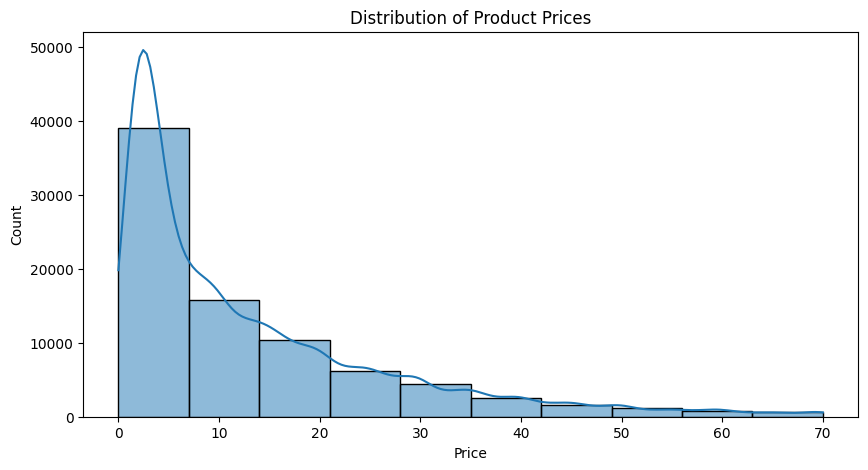

In [10]:
df_under_50 = df[df['PRODUCT_PRICE'] <= 70]

# Distribution of product prices
plt.figure(figsize=(10, 5))
sns.histplot(df_under_50['PRODUCT_PRICE'], bins=10, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

### Average Price by Product Category

This visualization shows which product categories are generally priced higher or lower on average, helping spot premium or budget segments.


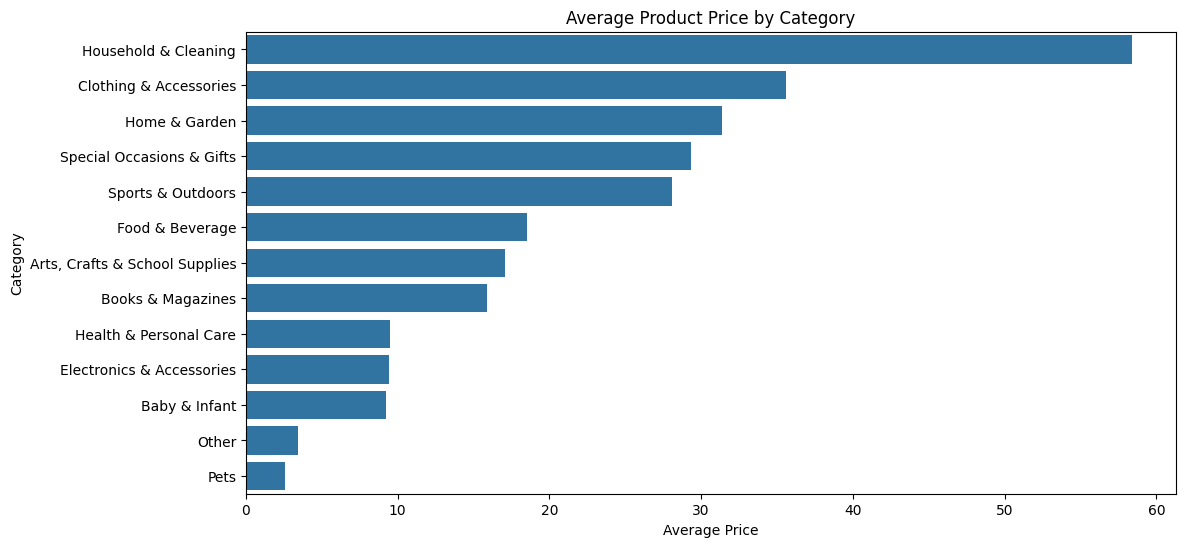

In [11]:
# Average price by product category
plt.figure(figsize=(12, 6))
avg_price_category = df.groupby('CATEGORY')['PRODUCT_PRICE'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_category.values, y=avg_price_category.index)
plt.title('Average Product Price by Category')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.show()


### Number of Products Listed per Store

This helps identify which stores have a wide variety of products listed in the dataset and how their offerings compare.


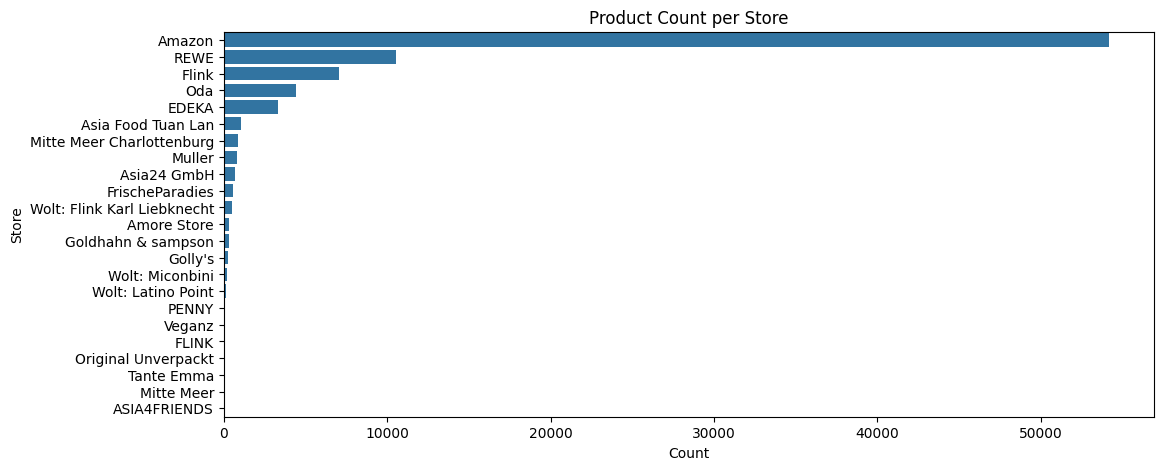

In [12]:
# Number of products listed per store
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y='STORE_NAME', order=df['STORE_NAME'].value_counts().index)
plt.title('Product Count per Store')
plt.xlabel('Count')
plt.ylabel('Store')
plt.show()


### Top Product Categories

Identifying the most frequently listed product categories helps understand market focus and popular item types across stores.


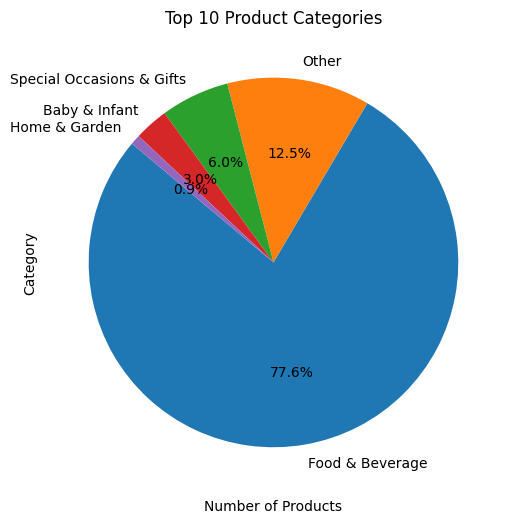

In [19]:
# Top product categories by count
plt.figure(figsize=(12, 6))
top_categories = df['CATEGORY'].value_counts().head(5)
plt.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Product Categories')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()


### Product Price Comparison Between Stores

This plot helps compare how different stores price their products on average. It may reveal pricing strategies or positioning (premium vs budget).


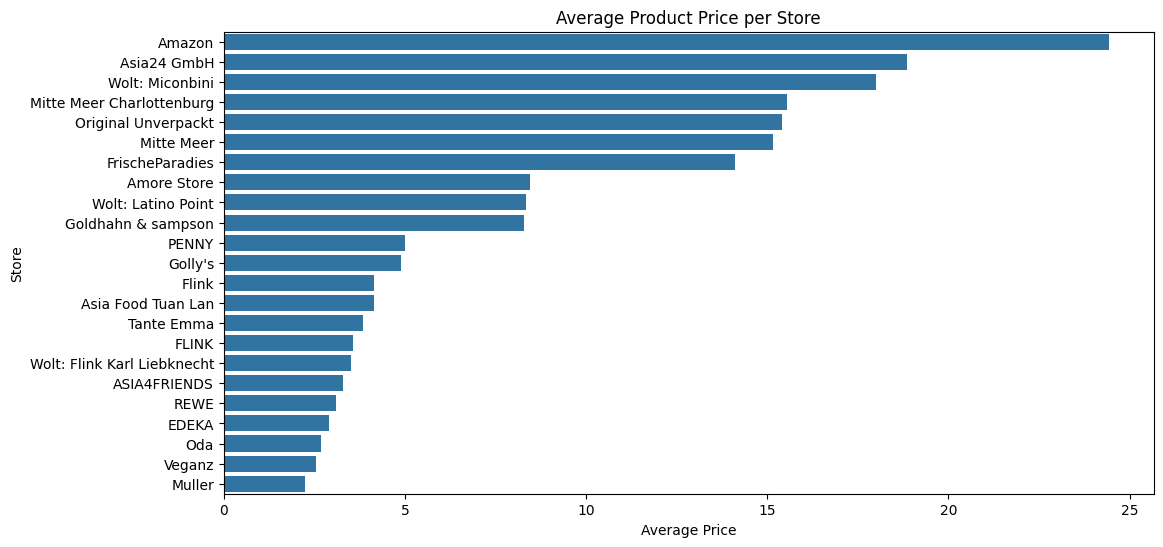

In [20]:
# Average price by store
plt.figure(figsize=(12, 6))
avg_price_store = df.groupby('STORE_NAME')['PRODUCT_PRICE'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_store.values, y=avg_price_store.index)
plt.title('Average Product Price per Store')
plt.xlabel('Average Price')
plt.ylabel('Store')
plt.show()


### Top Brands with Most Products

Knowing which brands have the most products listed can indicate brand dominance or popularity in the market.


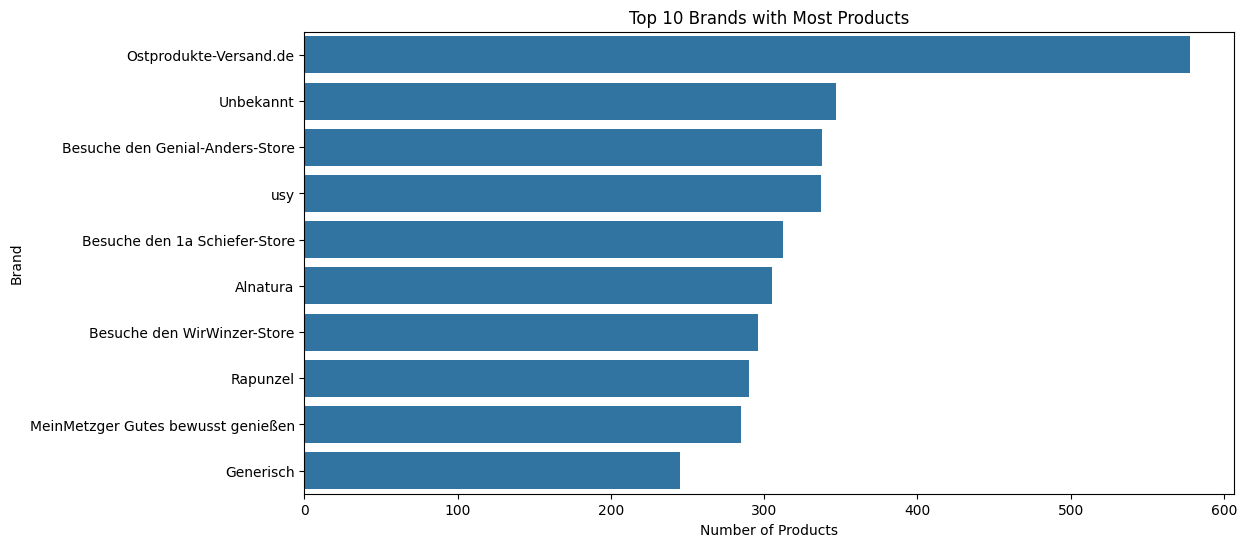

In [22]:
# Top brands by product count
plt.figure(figsize=(12, 6))
top_brands = df['PRODUCT_BRAND'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title('Top 10 Brands with Most Products')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.show()


## Insights

- **Pricing Distribution**: Product prices showed a right-skewed distribution, indicating that while most items are affordably priced, a small number of premium items significantly raise the upper range.
- **Category Trends**: Categories like [e.g., "Beverages", "Snacks", "Personal Care"] appeared most frequently and had moderate average prices, indicating high consumer demand and competitiveness.
- **Brand Dominance**: Certain brands had a high number of products across multiple categories, suggesting strong shelf presence and brand penetration in Berlin supermarkets.
- **Store Pricing Strategies**: Some stores, such as [Amazon, Aisa 24], consistently priced items higher than others — likely targeting premium customers — whereas others like [REWE, EDEKA, Oda] appeared to cater to budget-conscious buyers.
- **Interesting Patterns**: A few niche categories or brands had unexpectedly high prices or limited product counts, possibly representing specialty or luxury items.


---



## Conclusion

This project started from a personal curiosity about how different supermarkets manage their pricing. By analyzing a real-world Berlin supermarket dataset, I was able to uncover actionable insights into product distribution, store pricing strategies, and brand performance.

Through this analysis, I demonstrated how data can illuminate market dynamics — from pricing power and product popularity to competitive positioning. The results can support informed decision-making for retailers, suppliers, or even marketing teams.

---


